In [0]:
########################################################################
## Pattern Recognition - HW1 (Problem 1)
## Chung-Ang University
## Lecturer: Jongwon Choi (The graduate school of advanced imaging science, multimedia & film)
##           email: choijw@cau.ac.kr
########################################################################

# DO NOT USE ANY ADDITIONAL LIBRARY
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


(400, 50)
(400,)


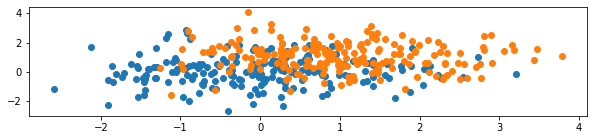

In [66]:
###################
## TRAINING DATA ##
###################
SIZE_TRAINING_DATA = 200
FEATURE_DIM = 50
np.random.seed(0)
feature_training = np.concatenate( (np.random.randn(SIZE_TRAINING_DATA, FEATURE_DIM), np.random.randn(SIZE_TRAINING_DATA, FEATURE_DIM) + 1.0), 0 )
label_training = np.concatenate( (np.zeros(SIZE_TRAINING_DATA), np.ones(SIZE_TRAINING_DATA)), 0)

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_training[label_training==0, 0], feature_training[label_training==0, 1])
ax.scatter(feature_training[label_training==1, 0], feature_training[label_training==1, 1])
f.show()

print(feature_training.shape)
print(label_training.shape)

(40, 50)


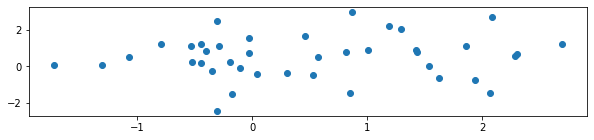

In [67]:
###############
## TEST DATA ##
###############
SIZE_TEST_DATA = 20
np.random.seed(1)
feature_test = np.concatenate( (np.random.randn(SIZE_TEST_DATA,FEATURE_DIM), np.random.randn(SIZE_TEST_DATA,FEATURE_DIM) + 1.0), 0 )

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[:, 0], feature_test[:, 1])
f.show()

print(feature_test.shape)

In [68]:
#############################################################
## Problem 1 - A
label_test = np.zeros(SIZE_TEST_DATA*2) # Estimate this by k-NN classifier (conventional k-NN classifier)
############################################################
print(label_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
def distance(arr1, arr2, num):
  total = 0.0
  diff = arr1 - arr2
  sqr = diff ** 2
  for i in range(num):
    total += sqr[i]
  total = total ** 0.5
  return total

In [0]:
def kNN(k, training_data, test_data, label_training_data, label_test_data):
  for i in range(len(test_data)):
    list_dist = []
    for j in range(len(training_data)): # push (index, distance) in list_dist
      dist = distance(test_data[i], training_data[j], FEATURE_DIM)
      list_dist.append((j, dist))

    # sort list_dist with distance by ascending order
    list_dist = sorted(list_dist, key=lambda x : x[1])
    # print(len(list_dist))
    # print(list_dist)

    # pop nearest k samples
    cand_list = []
    for m in range(k): 
      cand_list.append(list_dist[m][0]) # extract index
    # print(cand_list)

    # predict label
    count = 0
    for n in range(k): 
      cand_label = label_training_data[cand_list[n]]
      # print(n, cand_label)
      if cand_label == 1.0:
        count = count + 1

    if count > k/2:
      label_test_data[i] = 1
    else:
      label_test_data[i] = 0
  # print(label_test_data)

In [0]:
# Plot the samples
def plot_kNN(x, y):
  f, ax = plt.subplots(1, figsize=(10, 2))
  ax.scatter(x[y==0, 0], x[y==0, 1])
  ax.scatter(x[y==1, 0], x[y==1, 1])
  f.show()

k = 1
k = 3
k = 5
k = 7
k = 9


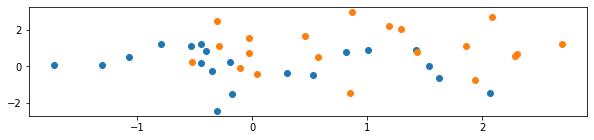

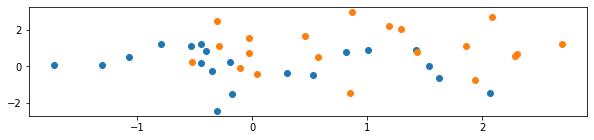

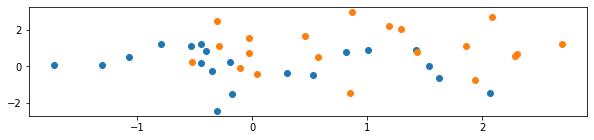

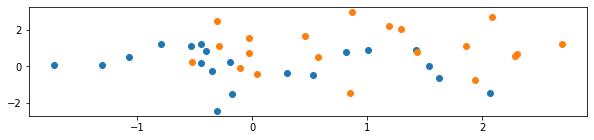

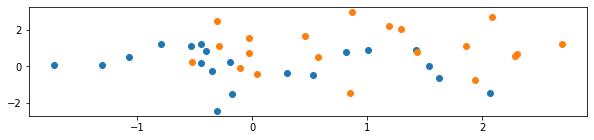

In [72]:
# Plot the samples when k=1,3,5,7,9
for i in range(1, 11, 2):
  print(f'k = {i}')
  kNN(i, feature_training, feature_test, label_training, label_test)
  plot_kNN(feature_test, label_test)

In [73]:
#############################################################
## Problem 1 - B
label_test = np.zeros(SIZE_TEST_DATA*2) # Estimate this by k-NN classifier (k-NN classifier with 5-fold cross-validation)
############################################################
print(feature_training.shape)
SIZE_EXPERIMENT_DATA = int(len(feature_training)/5)
# split feature_training into 5 groups
data_1_feature = feature_training[0:SIZE_EXPERIMENT_DATA]
data_2_feature = feature_training[SIZE_EXPERIMENT_DATA:SIZE_EXPERIMENT_DATA*2]
data_3_feature = feature_training[SIZE_EXPERIMENT_DATA*2:SIZE_EXPERIMENT_DATA*3]
data_4_feature = feature_training[SIZE_EXPERIMENT_DATA*3:SIZE_EXPERIMENT_DATA*4]
data_5_feature = feature_training[SIZE_EXPERIMENT_DATA*4:SIZE_EXPERIMENT_DATA*5]
print(f'data_1_feature: {data_1_feature.shape}', f'data_2_feature: {data_2_feature.shape}',\
f'data_3_feature: {data_3_feature.shape}', f'data_4_feature: {data_4_feature.shape}', f'data_5_feature: {data_5_feature.shape}')

(400, 50)
data_1_feature: (80, 50) data_2_feature: (80, 50) data_3_feature: (80, 50) data_4_feature: (80, 50) data_5_feature: (80, 50)


In [74]:
print(label_training.shape)
# split label_training into 5 groups
data_1_label = label_training[0:SIZE_EXPERIMENT_DATA]
data_2_label = label_training[SIZE_EXPERIMENT_DATA:SIZE_EXPERIMENT_DATA*2]
data_3_label = label_training[SIZE_EXPERIMENT_DATA*2:SIZE_EXPERIMENT_DATA*3]
data_4_label = label_training[SIZE_EXPERIMENT_DATA*3:SIZE_EXPERIMENT_DATA*4]
data_5_label = label_training[SIZE_EXPERIMENT_DATA*4:SIZE_EXPERIMENT_DATA*5]
print(f'data_1_label: {data_1_label.shape}', f'data_2_label: {data_2_label.shape}',\
f'data_3_label: {data_3_label.shape}', f'data_4_label: {data_4_label.shape}', f'data_5_label: {data_5_label.shape}')

(400,)
data_1_label: (80,) data_2_label: (80,) data_3_label: (80,) data_4_label: (80,) data_5_label: (80,)


In [75]:
# label which will be updated with cross-validation
label_test_1 = np.zeros(SIZE_EXPERIMENT_DATA)
label_test_2 = np.zeros(SIZE_EXPERIMENT_DATA)
label_test_3 = np.zeros(SIZE_EXPERIMENT_DATA)
label_test_4 = np.zeros(SIZE_EXPERIMENT_DATA)
label_test_5 = np.zeros(SIZE_EXPERIMENT_DATA)
print(label_test_1.shape)

(80,)


In [0]:
# Experiment 1: 2,3,4,5 groups -> set_1_feature, set_1_label
# Experiment 2: 1,3,4,5 groups -> set_2_feature, set_2_label ...
set_1_feature = np.concatenate((data_2_feature, data_3_feature, data_4_feature, data_5_feature))
set_1_label = np.concatenate((data_2_label, data_3_label, data_4_label, data_5_label))

set_2_feature = np.concatenate((data_1_feature, data_3_feature, data_4_feature, data_5_feature))
set_2_label = np.concatenate((data_1_label, data_3_label, data_4_label, data_5_label))

set_3_feature = np.concatenate((data_1_feature, data_2_feature, data_4_feature, data_5_feature))
set_3_label = np.concatenate((data_1_label, data_2_label, data_4_label, data_5_label))

set_4_feature = np.concatenate((data_1_feature, data_2_feature, data_3_feature, data_5_feature))
set_4_label = np.concatenate((data_1_label, data_2_label, data_3_label, data_5_label))

set_5_feature = np.concatenate((data_1_feature, data_2_feature, data_3_feature, data_4_feature))
set_5_label = np.concatenate((data_1_label, data_2_label, data_3_label, data_4_label))

# print(f'set_1_feature: {set_1_feature.shape}', f'set_1_label: {set_1_label.shape}')
# print(set_1_label)

In [0]:
# Experiment 1: test (set_1_feature, set_1_label) with (data_1_feature, set_1_label)
# Experiment 2: test (set_2_feature, set_2_label) with (data_2_feature, set_2_label) ...
def CrossValidation(k):
  kNN(k, set_1_feature, data_1_feature, set_1_label, label_test_1)
  kNN(k, set_2_feature, data_2_feature, set_2_label, label_test_2)
  kNN(k, set_3_feature, data_3_feature, set_3_label, label_test_3)
  kNN(k, set_4_feature, data_4_feature, set_4_label, label_test_4)
  kNN(k, set_5_feature, data_5_feature, set_5_label, label_test_5)

  # plot_kNN(data_1_feature, label_test_1)
  # plot_kNN(data_2_feature, label_test_2)
  # plot_kNN(data_3_feature, label_test_3)
  # plot_kNN(data_4_feature, label_test_4)
  # plot_kNN(data_5_feature, label_test_5)

  error = distance(data_1_label, label_test_1, SIZE_EXPERIMENT_DATA) \
  + distance(data_1_label, label_test_2, SIZE_EXPERIMENT_DATA) \
  + distance(data_1_label, label_test_3, SIZE_EXPERIMENT_DATA) \
  + distance(data_1_label, label_test_4, SIZE_EXPERIMENT_DATA) \
  + distance(data_1_label, label_test_5, SIZE_EXPERIMENT_DATA)
  error /= 5
  return error

In [78]:
# print the errors of cross-validation
cand_k = [1,3,5,7,9]
list_error = []
for i in cand_k:
  error = CrossValidation(i)
  list_error.append((i, error))
list_error

[(1, 4.842619828067016),
 (3, 4.842619828067016),
 (5, 4.842619828067016),
 (7, 4.842619828067016),
 (9, 4.842619828067016)]

In [79]:
# sort list_dist with the error by ascending order
list_error = sorted(list_error, key=lambda x : x[1])
# print(len(list_dist))
print(list_error)

[(1, 4.842619828067016), (3, 4.842619828067016), (5, 4.842619828067016), (7, 4.842619828067016), (9, 4.842619828067016)]


In [80]:
best_k = list_error[0][0]
print(f'best hyperparameter k: {best_k}')

best hyperparameter k: 1


In [81]:
#############################################################
## Problem 1 - C
label_test = np.zeros(SIZE_TEST_DATA*2) # Estimate this by k-NN classifier (Bootstrapped 5 k-NN classifier)
############################################################

# make 5 dataset groups with (400, 50) using random number between (1~5)
data_n_feature = []
data_n_feature.append(data_1_feature)
data_n_feature.append(data_2_feature)
data_n_feature.append(data_3_feature)
data_n_feature.append(data_4_feature)
data_n_feature.append(data_5_feature)

data_n_label = []
data_n_label.append(data_1_label)
data_n_label.append(data_2_label)
data_n_label.append(data_3_label)
data_n_label.append(data_4_label)
data_n_label.append(data_5_label)

def makeDataset():
  random_list = np.random.choice(5, 5, replace=True) # print 0~4 allowing repeat
  print(random_list)

  set_feature = np.concatenate((data_n_feature[random_list[0]], data_n_feature[random_list[1]]\
  , data_n_feature[random_list[2]], data_n_feature[random_list[3]], data_n_feature[random_list[4]]))
  set_label = np.concatenate((data_n_label[random_list[0]], data_n_label[random_list[1]]\
  , data_n_label[random_list[2]], data_n_label[random_list[3]], data_n_label[random_list[4]]))

  return set_feature, set_label

set_1_feature, set_1_label = makeDataset()
set_2_feature, set_2_label = makeDataset()
set_3_feature, set_3_label = makeDataset()
set_4_feature, set_4_label = makeDataset()
set_5_feature, set_5_label = makeDataset()

print(set_1_feature.shape)
print(set_1_label.shape)

[4 0 2 2 0]
[1 3 1 2 4]
[2 0 3 4 4]
[4 0 1 2 2]
[3 1 0 2 2]
(400, 50)
(400,)


In [82]:
label_test_1 = np.zeros(len(label_test))
label_test_2 = np.zeros(len(label_test))
label_test_3 = np.zeros(len(label_test))
label_test_4 = np.zeros(len(label_test))
label_test_5 = np.zeros(len(label_test))
print(label_test_1.shape)

(40,)


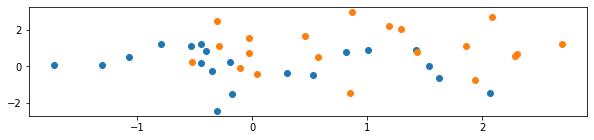

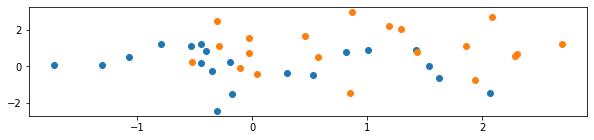

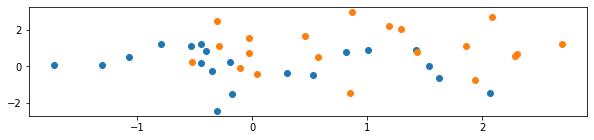

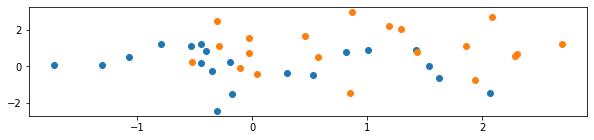

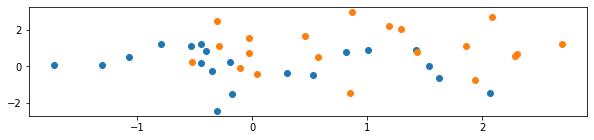

In [83]:
# Experiment with fixed hyperparamer k = 3

kNN(3, set_1_feature, feature_test, set_1_label, label_test_1)
plot_kNN(feature_test, label_test_1)
kNN(3, set_2_feature, feature_test, set_2_label, label_test_2)
plot_kNN(feature_test, label_test_2)
kNN(3, set_3_feature, feature_test, set_3_label, label_test_3)
plot_kNN(feature_test, label_test_3)
kNN(3, set_4_feature, feature_test, set_4_label, label_test_4)
plot_kNN(feature_test, label_test_4)
kNN(3, set_5_feature, feature_test, set_5_label, label_test_5)
plot_kNN(feature_test, label_test_5)

In [0]:
# vote the prediction again among label_test_1~label_test_5
label_sum = np.zeros_like(label_test)
for i in range(len(label_test)):
  label_sum[i] = np.sum(label_test_1[i]+label_test_2[i]\
  +label_test_3[i]+label_test_4[i]+label_test_5[i])
for i in range(len(label_test)):
  if label_sum[i] > 3: # test set/2
    label_sum[i] = 1
  else:
    label_sum[i] = 0
label_test = label_sum

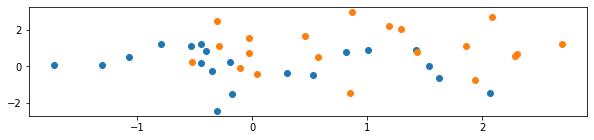

In [85]:
# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[label_test==0, 0], feature_test[label_test==0, 1])
ax.scatter(feature_test[label_test==1, 0], feature_test[label_test==1, 1])
f.show()

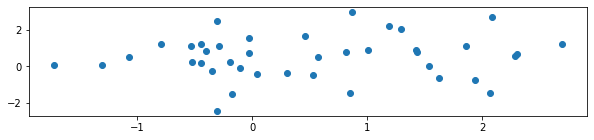

In [86]:
#############################################################
## Bonus Problem 1 - D
## For this problem, you need to show and compare the computational time of Problem 1-A and 1-D.
label_test = np.zeros(SIZE_TEST_DATA*2) # Estimate this by k-NN classifier (Double up the speed from Problem 1-A)

############################################################
## Your implementation

############################################################

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[label_test==0, 0], feature_test[label_test==0, 1])
ax.scatter(feature_test[label_test==1, 0], feature_test[label_test==1, 1])
f.show()